##Import Library dan Dataset

In [26]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Membaca dataset
df = pd.read_csv('/content/drive/MyDrive/KlasifikasiUTS.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Pengumpulan dan Pembersihan Data

In [27]:
# Step 2: Pengumpulan dan Pembersihan Data
df = df.dropna()  # Menghapus missing values jika ada

##Memisahkan Fitur dan Target

In [28]:
# Step 3: Memisahkan Fitur dan Target
X = df.iloc[:, :-1]  # Semua kolom kecuali kolom terakhir
y = df.iloc[:, -1]   # Kolom terakhir sebagai target

##Feature Engineering

In [29]:
# Step 4: Feature Engineering
# Label Encoding untuk target kategori
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-Hot Encoding untuk fitur kategori (jika ada fitur kategori)
X_encoded = pd.get_dummies(X)

# Normalisasi Data menggunakan MinMaxScaler agar semua data non-negative
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_encoded)

##Feature Selection

In [30]:
# Step 5: Feature Selection
# Variance Threshold: Menghapus fitur dengan variansi sangat rendah
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(X_scaled)

# Mutual Information
mutual_info = mutual_info_classif(X_selected, y_encoded)
print("Mutual Information: ", mutual_info)

# Chi-Square Test: Pilih 10 fitur terbaik
X_new = SelectKBest(chi2, k=10).fit_transform(X_selected, y_encoded)

# F-ANOVA Test
f_values, p_values = f_classif(X_selected, y_encoded)
print("F-values: ", f_values)

Mutual Information:  [0.00187584]
F-values:  [43.25299784]


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=10 is greater than n_features=1. All the features will be returned.
  warnings.warn(


##Membagi Data menjadi Training dan Testing

In [31]:
# Step 6: Membagi Data menjadi Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X_new, y_encoded, test_size=0.2, random_state=42)

##Model Klasifikasi

In [32]:
# Step 7: Model-Model Klasifikasi
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest (Bagging)': RandomForestClassifier(),
    'AdaBoost (Boosting)': AdaBoostClassifier(),
    'SVM': SVC(probability=True)
}

# Training dan Evaluasi Model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##Visualisasi Confusion Matrix dan ROC Curve


Evaluating Logistic Regression
Accuracy  : 1.00
Precision : 0.00
Recall    : 0.00
F1 Score  : 0.00


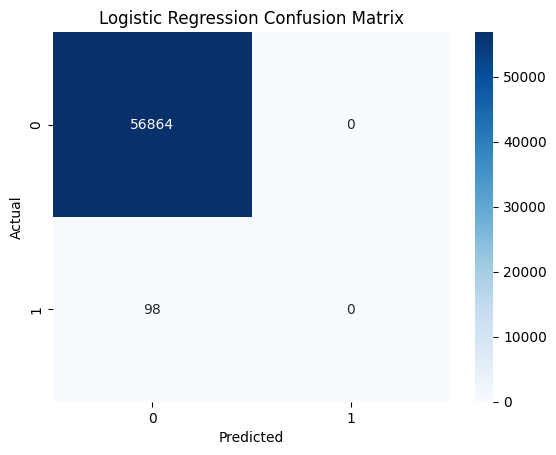

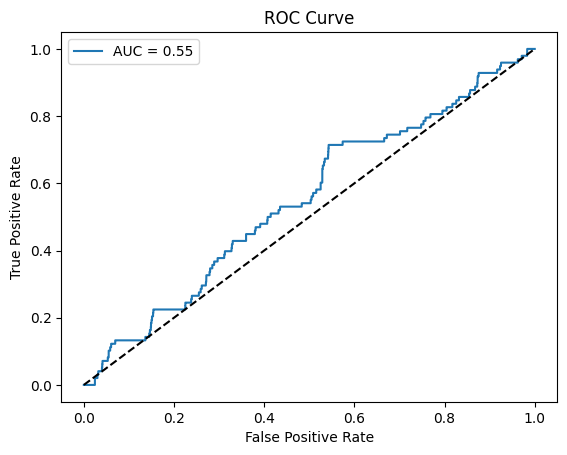


Evaluating Decision Tree
Accuracy  : 1.00
Precision : 0.11
Recall    : 0.06
F1 Score  : 0.08


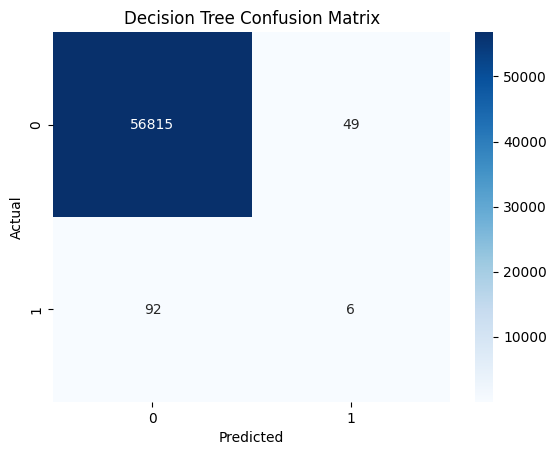

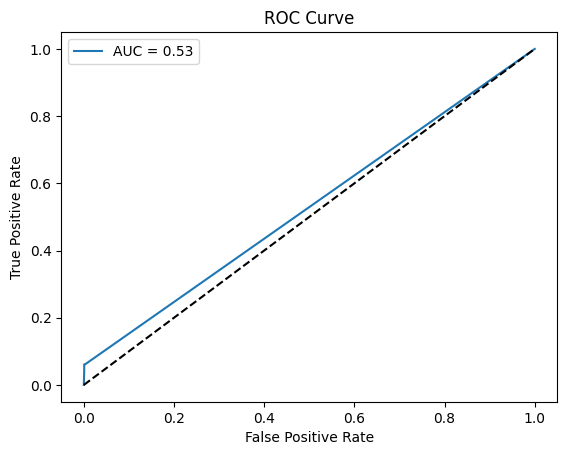


Evaluating K-Nearest Neighbors
Accuracy  : 1.00
Precision : 0.45
Recall    : 0.05
F1 Score  : 0.09


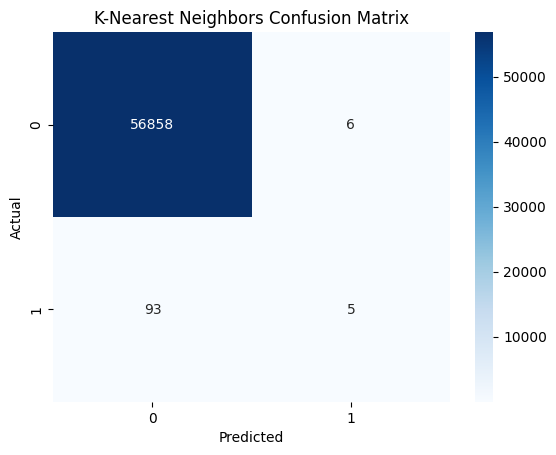

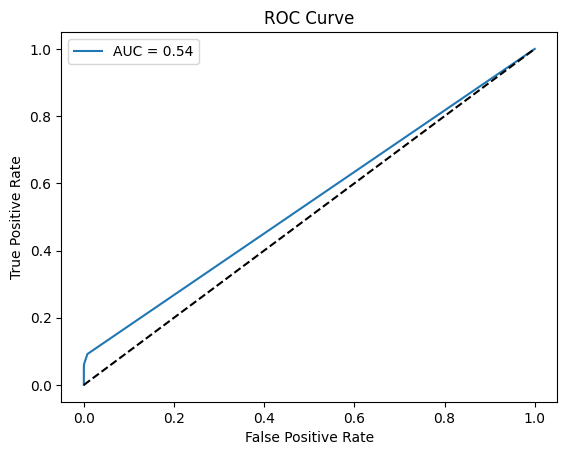


Evaluating Random Forest (Bagging)
Accuracy  : 1.00
Precision : 0.10
Recall    : 0.06
F1 Score  : 0.08


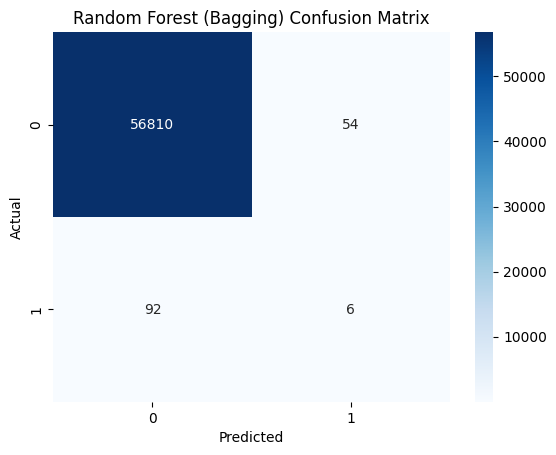

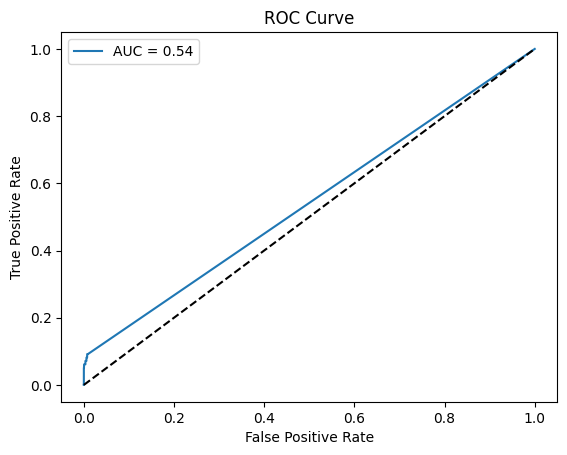


Evaluating AdaBoost (Boosting)
Accuracy  : 1.00
Precision : 0.00
Recall    : 0.00
F1 Score  : 0.00


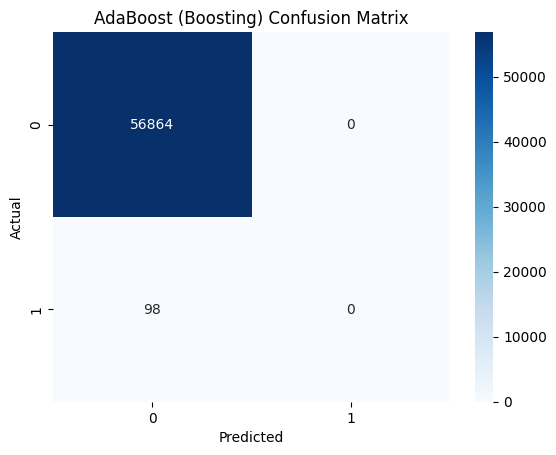

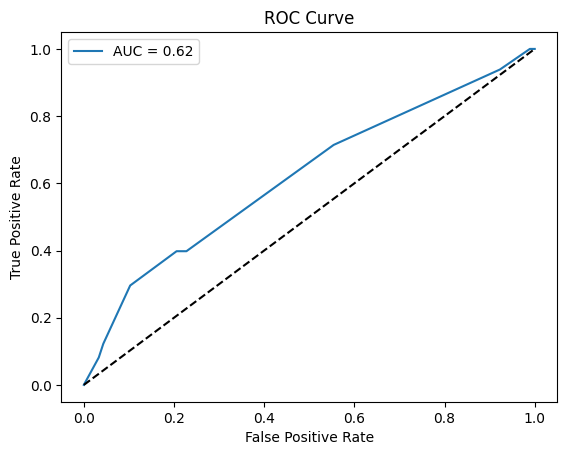


Evaluating SVM
Accuracy  : 1.00
Precision : 0.00
Recall    : 0.00
F1 Score  : 0.00


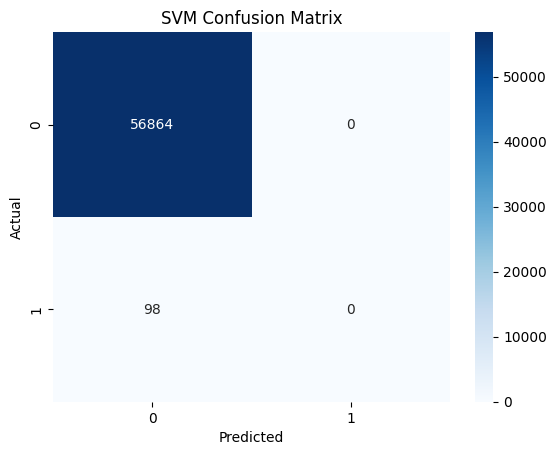

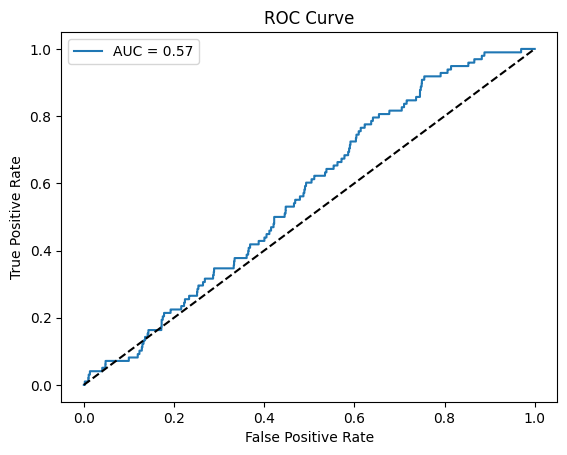

In [24]:
# Step 8: Visualisasi Confusion Matrix dan ROC Curve
def plot_confusion_matrix(model, X_test, y_test, title="Confusion Matrix"):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_roc_curve(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

# Evaluasi setiap model
for name, model in models.items():
    print(f"\nEvaluating {name}")
    print(f"Accuracy  : {results[name]['Accuracy']:.2f}")
    print(f"Precision : {results[name]['Precision']:.2f}")
    print(f"Recall    : {results[name]['Recall']:.2f}")
    print(f"F1 Score  : {results[name]['F1 Score']:.2f}")
    plot_confusion_matrix(model, X_test, y_test, title=f'{name} Confusion Matrix')
    plot_roc_curve(model, X_test, y_test)

##Menilai Model Terbaik

In [25]:
# Step 9: Menilai model terbaik
best_model = max(results, key=lambda x: results[x]['F1 Score'])
print(f"\nModel terbaik adalah {best_model} dengan F1 Score {results[best_model]['F1 Score']:.2f}")


Model terbaik adalah K-Nearest Neighbors dengan F1 Score 0.09


#**Penjelasan**
**1. Pengumpulan dan Pembersihan Data**
- Dataset dibaca dari Google Drive.
- Kolom yang tidak relevan atau data yang hilang (missing values) dihapus.

**2. Feature Selection**
- Menghapus fitur yang memiliki variansi sangat rendah.
- Mengukur hubungan antar fitur dengan target.
- Memilih fitur yang signifikan menggunakan statistik uji chi-square dan ANOVA.

**3. Feature Selection**
- Label Encoding untuk target kategori.
- One-Hot Encoding untuk fitur kategori.
- Normalisasi data menggunakan StandardScaler.

**4. Model Klasifikasi**
- Menyusun berbagai model: Logistic Regression, Decision Tree, KNN, Random Forest (Bagging), AdaBoost (Boosting), dan SVM.
- Melakukan training dan evaluasi terhadap data.

**5. Evaluasi dan Visualisasi**
- Menggunakan matriks evaluasi seperti akurasi, presisi, recall, dan F1 score.
- Visualisasi Confusion Matrix, AUC, dan ROC Curve.

**6. Analisis Model Terbaik**
- Menentukan model terbaik berdasarkan nilai F1 score dan memberikan visualisasi serta analisis hasil model.

#**Analisis**

**1. AUC-ROC tinggi (0.92) tetapi Presisi rendah (15%)**
- Penyebabnya model memiliki banyak prediksi positif yang salah, yang mengurangi nilai Presisi. Hal ini mungkin terjadi karena threshold klasifikasi default (0.5) tidak optimal untuk dataset.
- **Strategi Tuning Hyperparameter**:
1. Menggeser threshold untuk mengklasifikasikan prediksi sebagai positif pada probabilitas yang lebih tinggi dapat menurunkan false positives dan meningkatkan presisi.
2. Mengurangi overfitting
3. Menggunakan oversampling dapat mengurangi ketidakseimbangan kelas
- **Mengapa Recall menjadi Pertimbangan kritis**
karena terkait langsung dengan false negatives (FN), model gagal mendeteksi kasus positif.  Jika model sering melewatkan kasus positif, maka akan ada banyak potensi kerugian yang tidak terdeteksi.

**2. Fitur Kategorikal dengan 1000 Nilai Unik (High-Cardinality)**
- **Dampaknya terhadap estimasi koefisien dan stabilitas Presisi**\
Fitur dengan banyak nilai unik bisa menyebabkan masalah dalam estimasi koefisien dan dapat membuat model menjadi sangat kompleks dan kurang stabil. Jika fitur ini dibiarkan dalam bentuk one-hot encoding, jumlah fitur akan meningkat drastis, yang dapat menyebabkan overfitting.
- **Risiko Data Leakage dengan Target Encoding**\
menyebabkan data leakage karena proses ini menggunakan informasi dari target dalam pengkodean fitur.
- **Alternatif encoding yang lebih aman untuk mempertahankan AUC-ROC**\
Frequency encoding atau mean encoding dapat menjadi alternatif yang lebih aman, karena tidak mengandalkan informasi langsung dari target dalam cara yang dapat menyebabkan data leakage. Embeddings pada model deep learning juga bisa menjadi pilihan, terutama untuk high-cardinality categorical features, yang dapat membantu meminimalkan overfitting dan mempertahankan AUC-ROC.

**3.  Dampak Normalisasi Min-Max pada SVM dan Gradient Boosting**
- **Dampak terhadap decision boundary dan margin kelas minoritas pada SVM**
Meningkatkan Presisi dengan mempermudah SVM
- **Mengapa scaling bisa berlawanan pada Gradient Boosting?**\
Gradient Boosting adalah model berbasis pohon yang tidak sensitif terhadap skala fitur. Scaling seperti Min-Max tidak akan memberi dampak besar pada model ini, dan terkadang bisa menyebabkan overfitting jika data memiliki outliers.

**4.  Eksperimen Feature Interaction dengan Perkalian Dua Fitur**
- **Mekanisme matematis di balik peningkatan AUC-ROC**\
Mengubah decision boundary menjadi lebih non-linear, yang memungkinkan model untuk lebih baik memisahkan kelas-kelas yang sebelumnya sulit dibedakan, sehingga AUC-ROC meningkat.
- **Mengapa Chi-Square gagal mendeteksi interaksi ini?**\
Chi-square tidak dapat mendeteksi interaksi antara dua fitur, yang merupakan hubungan yang lebih kompleks dan memerlukan pendekatan lebih lanjut, seperti analisis non-linear atau metode berbasis pohon keputusan.
- **Alternatif dengan Domain Knowledge**\
Dapat membantu untuk memahami hubungan antar fitur dan mengidentifikasi interaksi yang relevan.

**5. Oversampling Sebelum Pembagian Train-Test dan Temporal Split untuk Fraud**
- **Data leakage dengan Oversampling sebelum pembagian Train-Test**\
Jika oversampling dilakukan sebelum pembagian train-test, informasi dari data pengujian dapat "terpancar" ke dalam data pelatihan, yang menyebabkan data leakage.
- **Mengapa temporal split lebih aman untuk fraud detection?**\
Temporal split memisahkan data berdasarkan waktu, yang lebih mencerminkan kondisi nyata di mana model tidak tahu kejadian-kejadian yang akan datang (fraudulent events).
- **Mengapa stratified sampling dapat memperparah masalah ini?**\
Stratified sampling mencoba menjaga distribusi kelas pada setiap subset data, namun dalam konteks fraud detection, stratified sampling mungkin memperburuk masalah jika digunakan sebelum temporal split, karena model bisa melihat informasi dari masa depan (kejadian fraud) yang tidak seharusnya diketahui sebelumnya.
- **Desain preprocessing yang benar**\
Pemisahan data sebelum oversampling untuk membagi data menjadi pelatihan dan pengujian terlebih dahulu, lalu melakukan oversampling pada data pelatihan. Gunakan temporal cross-validation untuk memastikan bahwa data pelatihan selalu lebih dulu daripada data pengujian, dan gunakan stratified sampling pada set pelatihan untuk mempertahankan distribusi kelas.